# Explore MAFs for Neanderthal-introgressed SNPs using 1000 genomes all population data

This code investigates the minor allele frequencies (MAFs) for Neanderthal-introgressed SNPs that are present in the 1000 genomes all population dataset, which comprises [26 populations](https://www.internationalgenome.org/category/population/), and plots the data for visualisation.

Neanderthal SNPs from:
1. Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. Genome Biol 2017 18:61.
2. Simonti CN et al. The phenotypic legacy of admixture between modern humans and Neandertals. Science 2016 351:737-41.

1000 genomes data from:
* [1000 genomes](http://www.internationalgenome.org/data)

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import venn3, venn3_unweighted

In [2]:
# Load allpop_df
allpop_df = pd.read_csv("allpop_fixed.csv")
allpop_df[['Source', 'ID', 'Major', 'Minor']] = allpop_df[['Source', 'ID', 'Major', 'Minor']].astype('str')
allpop_df.drop('EUR', axis=1, inplace=True) # Remove EUR column which is a super population
allpop = allpop_df.dropna()

allpop.head()

,Chromosome,Position,Source,ID,Major,Minor,ACB,PUR,IBS,PJL,...,GIH,FIN,PEL,ITU,MSL,STU,CLM,CDX,Major count,Minor count
0,1,834360,simonti_only,rs118163204,C,T,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.011,4778.0,20.0
1,1,838695,simonti_only,rs79501908,G,A,0.005,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.018,0.0,0.005,0.011,4768.0,30.0
2,1,850373,simonti_only,rs151325546,A,G,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,4789.0,9.0
3,1,854793,simonti_only,rs80174979,A,C,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,4789.0,9.0
4,1,1880284,simonti_only,rs78110450,C,T,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.124,4746.0,52.0


### Summary stats

In [3]:
# AFR
allpop[['ESN', 'YRI', 'MSL', 'GWD', 'LWK']].describe()

,ESN,YRI,MSL,GWD,LWK
count,352762.000000,352762.000000,352762.000000,352762.000000,352762.000000
mean,0.001714,0.001325,0.002412,0.002634,0.003229
std,0.011315,0.009989,0.012729,0.012217,0.012601
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.995000


In [4]:
# AFR admixed
allpop[['ACB', 'ASW']].describe()

,ACB,ASW
count,352762.000000,352762.000000
mean,0.005964,0.010419
std,0.013161,0.018106
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.005000,0.016000
max,0.948000,0.852000


In [5]:
# AMR
allpop[['PUR', 'CLM', 'MXL', 'PEL']].describe()

,PUR,CLM,MXL,PEL
count,352762.000000,352762.000000,352762.000000,352762.000000
mean,0.032479,0.035562,0.038437,0.040350
std,0.049091,0.053166,0.061601,0.081867
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.014000,0.016000,0.016000,0.006000
75%,0.043000,0.048000,0.047000,0.035000
max,0.716000,0.750000,0.758000,0.818000


In [6]:
# EUR
allpop[['IBS', 'TSI', 'GBR', 'CEU', 'FIN']].describe()

,IBS,TSI,GBR,CEU,FIN
count,352762.000000,352762.000000,352762.000000,352762.000000,352762.000000
mean,0.036160,0.036340,0.037480,0.037911,0.038957
std,0.058626,0.058599,0.060672,0.060941,0.061533
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.014000,0.014000,0.011000,0.015000,0.015000
75%,0.047000,0.047000,0.049000,0.051000,0.051000
max,0.766000,0.860000,0.747000,0.803000,0.758000


In [7]:
# SAS
allpop[['STU', 'ITU', 'PJL', 'GIH', 'BEB']].describe()

,STU,ITU,PJL,GIH,BEB
count,352762.000000,352762.000000,352762.000000,352762.000000,352762.000000
mean,0.036267,0.036233,0.036563,0.036517,0.037469
std,0.049166,0.049921,0.049498,0.051014,0.048862
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005000,0.005000,0.005000,0.000000,0.006000
50%,0.020000,0.020000,0.021000,0.019000,0.023000
75%,0.049000,0.049000,0.052000,0.049000,0.052000
max,1.000000,0.995000,1.000000,0.723000,1.000000


In [8]:
# EAS
allpop[['KHV', 'CDX', 'JPT', 'CHB']].describe()

,KHV,CDX,JPT,CHB
count,352762.000000,352762.000000,352762.000000,352762.000000
mean,0.043816,0.044103,0.044587,0.045101
std,0.072227,0.074353,0.074105,0.074262
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.010000,0.011000,0.010000,0.010000
75%,0.056000,0.059000,0.063000,0.058000
max,0.904000,0.935000,0.938000,0.922000


### Plot range of MAFs

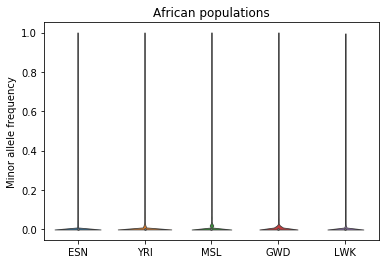

In [9]:
# AFR
order = ['ESN', 'YRI', 'MSL', 'GWD', 'LWK']
sns.violinplot(data=allpop[['LWK', 'GWD', 'MSL', 'YRI', 'ESN']], order=order, linewidth=0.8)
plt.ylabel("Minor allele frequency")
plt.title("African populations")
plt.show()

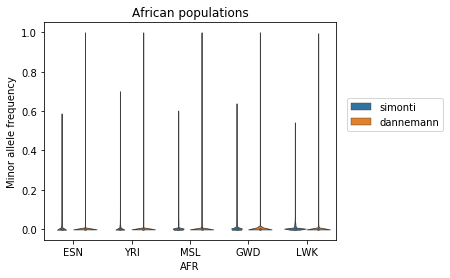

In [10]:
# AFR by source
simonti = allpop.loc[allpop.Source != 'dannemann_only'].copy()
simonti['Source'] = 'simonti'
dannemann = allpop.loc[allpop.Source != 'simonti_only'].copy()
dannemann['Source'] = 'dannemann'
concat_df = pd.concat([simonti, dannemann])
concat_df = pd.melt(concat_df,
                    id_vars=['Chromosome', 'Position', 'Source', 'ID', 'Major', 'Minor', 'ACB',
                             'PUR', 'IBS', 'PJL', 'CHB', 'JPT', 'GBR', 'CEU', 'MXL', 'BEB', 'KHV',
                             'ASW', 'TSI', 'GIH', 'FIN', 'PEL', 'ITU', 'STU', 'CLM', 'CDX'],
                    var_name='AFR', value_name='AFR_MAF')

order = ['ESN', 'YRI', 'MSL', 'GWD', 'LWK']
sns.violinplot(x='AFR', y='AFR_MAF', data=concat_df, order=order, hue='Source', linewidth=0.8)
plt.ylabel("Minor allele frequency")
plt.title("African populations")
plt.legend(loc=(1.04, 0.5))
plt.subplots_adjust(right=0.8)
plt.show()

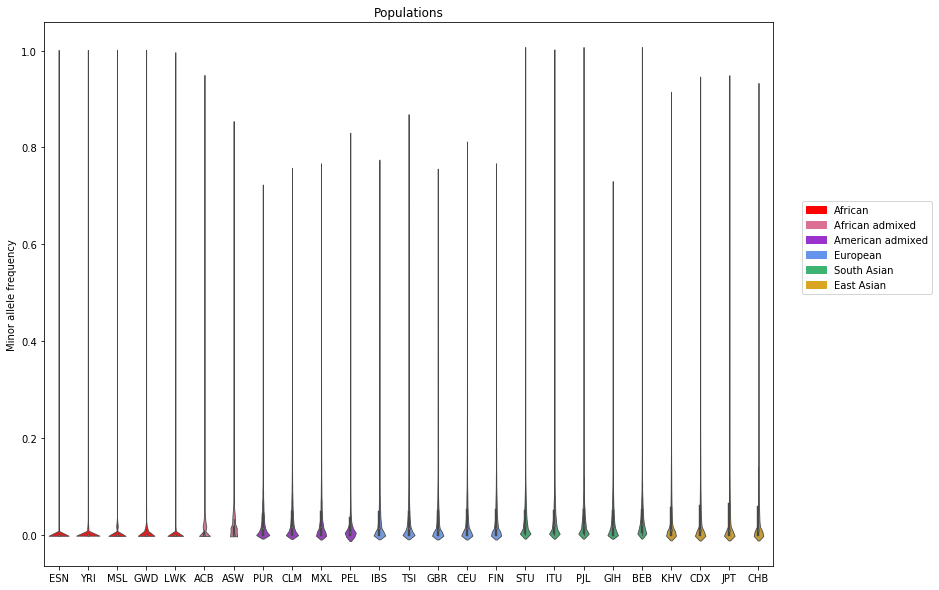

In [11]:
# All populations
order = ['ESN', 'YRI', 'MSL', 'GWD', 'LWK', 'ACB', 'ASW',
         'PUR', 'CLM', 'MXL', 'PEL',
         'IBS', 'TSI', 'GBR', 'CEU', 'FIN',
         'STU', 'ITU', 'PJL', 'GIH', 'BEB',
         'KHV', 'CDX', 'JPT', 'CHB']
colours = ['red', 'red', 'red', 'red', 'red', 'palevioletred', 'palevioletred',
           'darkorchid', 'darkorchid', 'darkorchid', 'darkorchid',
           'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue',
           'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen',
           'goldenrod', 'goldenrod', 'goldenrod', 'goldenrod']

plt.figure(figsize=(15, 10))
sns.violinplot(data=allpop[['ESN', 'YRI', 'MSL', 'GWD', 'LWK', 'ACB', 'ASW', 'IBS', 'TSI', 'GBR',
                            'CEU', 'FIN', 'STU', 'ITU', 'PJL', 'GIH', 'BEB', 'KHV', 'CDX', 'JPT',
                            'CHB', 'PUR', 'CLM', 'MXL', 'PEL']], order=order, palette=colours, linewidth=0.8)
plt.ylabel("Minor allele frequency")
plt.title("Populations")

# Create legend manually
red = mpatches.Patch(color='red', label='African')
dark_red = mpatches.Patch(color='palevioletred', label='African admixed')
purple = mpatches.Patch(color='darkorchid', label='American admixed')
blue = mpatches.Patch(color='cornflowerblue', label='European')
green = mpatches.Patch(color='mediumseagreen', label='South Asian')
yellow = mpatches.Patch(color='goldenrod', label='East Asian')
plt.legend(handles=[red, dark_red, purple, blue, green, yellow], loc=(1.04, 0.5))

plt.subplots_adjust(right=0.8)
plt.show()

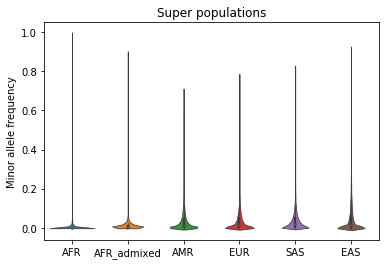

In [13]:
# Super populations
# Get means
allpop.loc[:,'AFR'] = allpop.loc[:,['ESN', 'YRI', 'MSL', 'GWD', 'LWK']].mean(axis=1)
allpop.loc[:,'AFR_admixed'] = allpop.loc[:,['ACB', 'ASW']].mean(axis=1)
allpop.loc[:,'AMR'] = allpop.loc[:,['PUR', 'CLM', 'MXL', 'PEL']].mean(axis=1)
allpop.loc[:,'EUR'] = allpop.loc[:,['IBS', 'TSI', 'GBR', 'CEU', 'FIN']].mean(axis=1)
allpop.loc[:,'SAS'] = allpop.loc[:,['STU', 'ITU', 'PJL', 'GIH', 'BEB']].mean(axis=1)
allpop.loc[:,'EAS'] = allpop.loc[:,['KHV', 'CDX', 'JPT', 'CHB']].mean(axis=1)

order = ['AFR', 'AFR_admixed', 'AMR', 'EUR', 'SAS', 'EAS']
sns.violinplot(data=allpop[['AFR', 'AFR_admixed', 'AMR', 'EUR', 'SAS', 'EAS']], order=order, linewidth=0.8)
plt.ylabel("Minor allele frequency")
plt.title("Super populations")
plt.show()

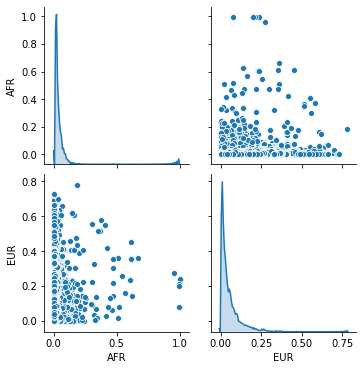

In [14]:
# Pairplot between AFR & EUR superpopulations
sns.pairplot(allpop[['AFR', 'EUR']], diag_kind="kde")

### Neanderthal-introgressed SNPs with MAF > 0.01 in African populations

In [15]:
# Number of SNPs with MAF>0.01 in AFR populations
for pop in ['ESN', 'YRI', 'MSL', 'GWD', 'LWK']:
    df = allpop.loc[allpop[pop] > 0.01]
    print('\033[1m' + pop + '\033[0m', 'Total: ' + str(len(df)), df['Source'].value_counts(), sep='\n')

ESN
Total: 12221
simonti_only      10286
dannemann_only     1483
both                452
Name: Source, dtype: int64
YRI
Total: 10931
simonti_only      10812
dannemann_only       99
both                 20
Name: Source, dtype: int64
MSL
Total: 22912
simonti_only      13277
dannemann_only     7476
both               2159
Name: Source, dtype: int64
GWD
Total: 20593
simonti_only      11928
dannemann_only     6619
both               2046
Name: Source, dtype: int64
LWK
Total: 25392
simonti_only      11871
dannemann_only    10369
both               3152
Name: Source, dtype: int64


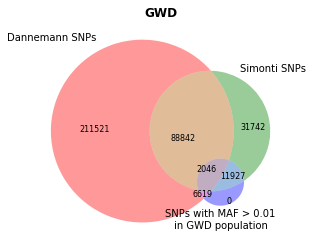

In [16]:
# Venn diagram for GWD
GWD = allpop.loc[allpop['GWD'] > 0.01]
gwd = []
for chrom, pos in zip(GWD['Chromosome'], GWD['Position']):
    gwd.append(str(chrom) + ' ' + str(pos))
dann = []
for chrom, pos in zip(dannemann['Chromosome'], dannemann['Position']):
    dann.append(str(chrom) + ' ' + str(pos))
simo = []
for chrom, pos in zip(simonti['Chromosome'], simonti['Position']):
    simo.append(str(chrom) + ' ' + str(pos))

g = venn3(subsets=(set(dann), set(simo), set(gwd)),
          set_labels=('Dannemann SNPs', 'Simonti SNPs', 'SNPs with MAF > 0.01\nin GWD population'))
for text in g.set_labels:
    text.set_fontsize(10)
for text in g.subset_labels:
    text.set_fontsize(8)
plt.title("GWD", fontweight="bold")
plt.show()

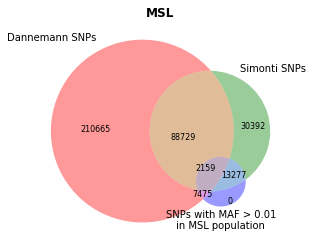

In [17]:
# Venn diagram for MSL
MSL = allpop.loc[allpop['MSL'] > 0.01]
msl = []
for chrom, pos in zip(MSL['Chromosome'], MSL['Position']):
    msl.append(str(chrom) + ' ' + str(pos))
dann = []
for chrom, pos in zip(dannemann['Chromosome'], dannemann['Position']):
    dann.append(str(chrom) + ' ' + str(pos))
simo = []
for chrom, pos in zip(simonti['Chromosome'], simonti['Position']):
    simo.append(str(chrom) + ' ' + str(pos))

m = venn3(subsets=(set(dann), set(simo), set(msl)),
      set_labels=('Dannemann SNPs', 'Simonti SNPs', 'SNPs with MAF > 0.01\nin MSL population'))
for text in m.set_labels:
    text.set_fontsize(10)
for text in m.subset_labels:
    text.set_fontsize(8)
plt.title("MSL", fontweight="bold")
plt.show()

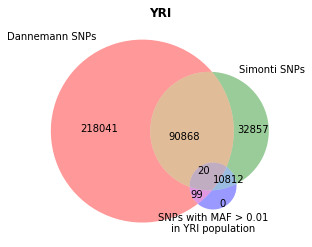

In [18]:
# Venn diagram for YRI
YRI = allpop.loc[allpop['YRI'] > 0.01]
yri = []
for chrom, pos in zip(YRI['Chromosome'], YRI['Position']):
    yri.append(str(chrom) + ' ' + str(pos))
dann = []
for chrom, pos in zip(dannemann['Chromosome'], dannemann['Position']):
    dann.append(str(chrom) + ' ' + str(pos))
simo = []
for chrom, pos in zip(simonti['Chromosome'], simonti['Position']):
    simo.append(str(chrom) + ' ' + str(pos))

y = venn3_unweighted(subsets=(set(dann), set(simo), set(yri)), subset_areas=(218,32,90,0,9,10,2),
      set_labels=('Dannemann SNPs', 'Simonti SNPs', 'SNPs with MAF > 0.01\nin YRI population'))
for text in y.set_labels:
    text.set_fontsize(10)
plt.title("YRI", fontweight="bold")
plt.show()

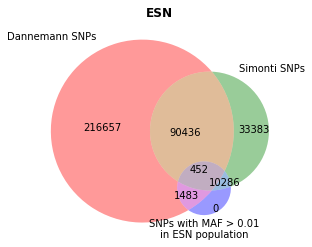

In [19]:
# Venn diagram for ESN
ESN = allpop.loc[allpop['ESN'] > 0.01]
esn = []
for chrom, pos in zip(ESN['Chromosome'], ESN['Position']):
    esn.append(str(chrom) + ' ' + str(pos))
dann = []
for chrom, pos in zip(dannemann['Chromosome'], dannemann['Position']):
    dann.append(str(chrom) + ' ' + str(pos))
simo = []
for chrom, pos in zip(simonti['Chromosome'], simonti['Position']):
    simo.append(str(chrom) + ' ' + str(pos))

e = venn3_unweighted(subsets=(set(dann), set(simo), set(esn)), subset_areas=(216,33,90,0,14,10,4),
      set_labels=('Dannemann SNPs', 'Simonti SNPs', 'SNPs with MAF > 0.01\nin ESN population'))
for text in e.set_labels:
    text.set_fontsize(10)
plt.title("ESN", fontweight="bold")
plt.show()

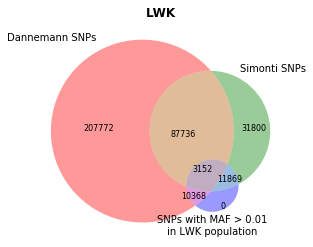

In [20]:
# Venn diagram for LWK
LWK = allpop.loc[allpop['LWK'] > 0.01]
lwk = []
for chrom, pos in zip(LWK['Chromosome'], LWK['Position']):
    lwk.append(str(chrom) + ' ' + str(pos))
dann = []
for chrom, pos in zip(dannemann['Chromosome'], dannemann['Position']):
    dann.append(str(chrom) + ' ' + str(pos))
simo = []
for chrom, pos in zip(simonti['Chromosome'], simonti['Position']):
    simo.append(str(chrom) + ' ' + str(pos))

l = venn3(subsets=(set(dann), set(simo), set(lwk)),
      set_labels=('Dannemann SNPs', 'Simonti SNPs', 'SNPs with MAF > 0.01\nin LWK population'))
for text in l.set_labels:
    text.set_fontsize(10)
for text in l.subset_labels:
    text.set_fontsize(8)
plt.title("LWK", fontweight="bold")
plt.show()